In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/kaggle/input/corona-virus-report/country_wise_latest.csv')

In [11]:
print("Dataframe Info:")
print(df.info())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              18

In [12]:
print("\nBasic Statistics:")
print(df.info())


Basic Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region             

In [13]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [14]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [15]:
df=df.dropna()

In [100]:
country_group=df.groupby('Country/Region')[['Confirmed','Deaths','Recovered','New cases','New deaths','New recovered','Active']].sum()


In [19]:
top_confirmed = country_group.sort_values('Confirmed', ascending=False).head(10)

In [18]:
top_deaths = country_group.sort_values('Deaths', ascending=False).head(10)

In [20]:
top_recovered = country_group.sort_values('Recovered', ascending=False).head(10)

In [63]:
top_new_cases = country_group.sort_values('New cases', ascending=False).head(10)

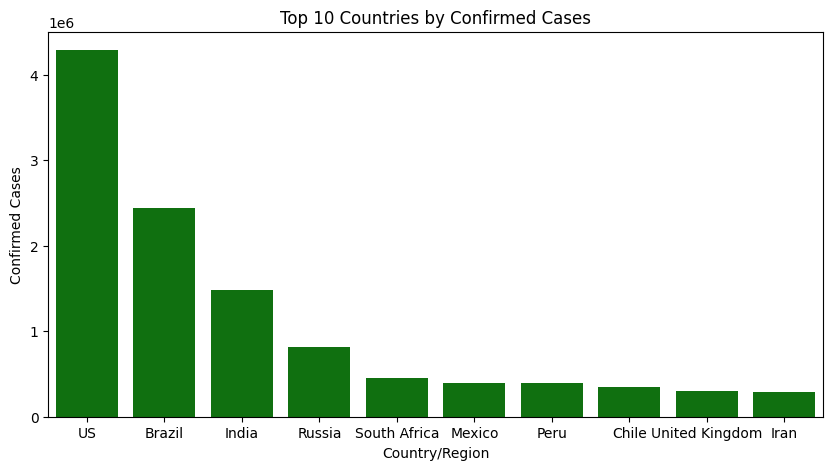

In [81]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Country/Region',y='Confirmed',data=country_group.reset_index().sort_values('Confirmed',ascending=False).head(10),color='g')
plt.title('Top 10 Countries by Confirmed Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Country/Region')
plt.show()

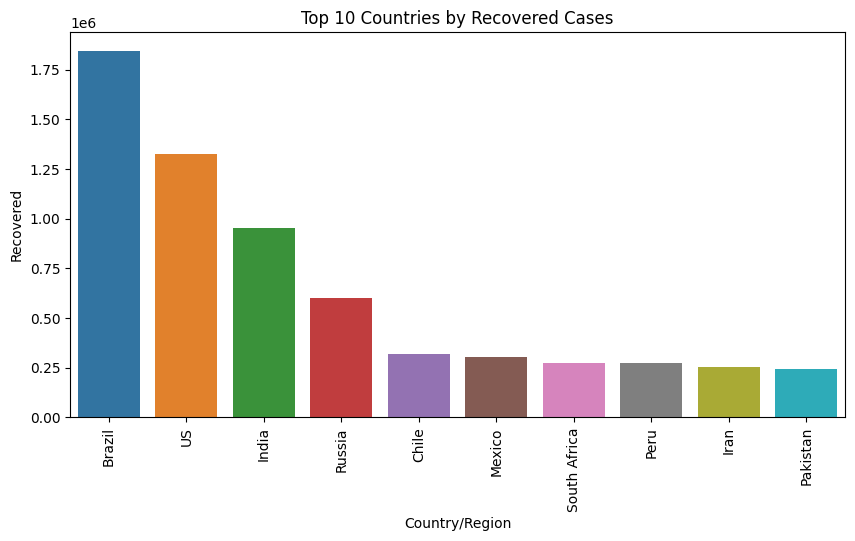

In [82]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Country/Region', y='Recovered', data=country_group.reset_index().sort_values('Recovered', ascending=False).head(10))
plt.title('Top 10 Countries by Recovered Cases')
plt.xticks(rotation=90)
plt.show()

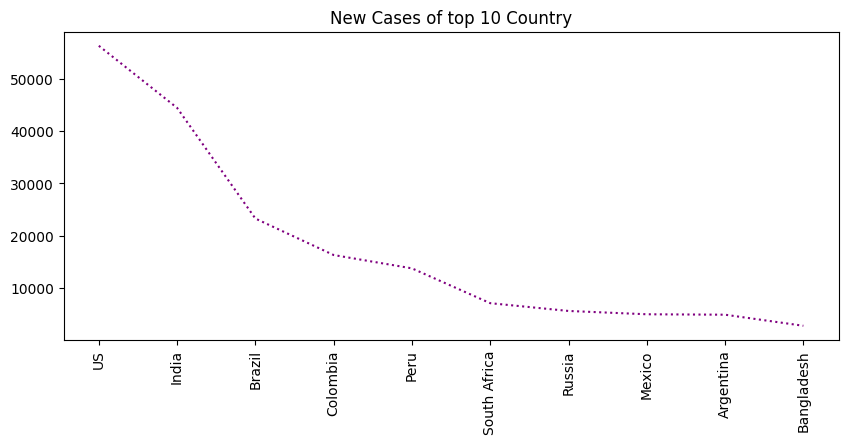

In [83]:
plt.figure(figsize=(10, 4))
plt.plot('Country/Region','New cases',color='purple',linestyle=':', data=country_group.reset_index().sort_values('New cases', ascending=False).head(10))
plt.title('New Cases of top 10 Country')
plt.xticks(rotation=90)
plt.show()

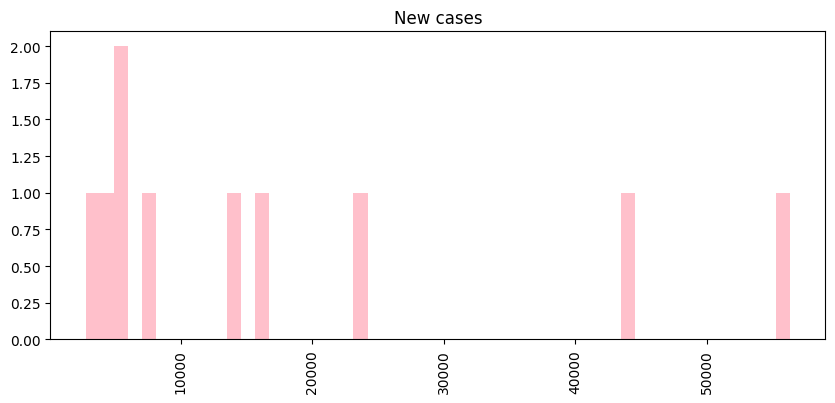

In [84]:
plt.figure(figsize=(10, 4))
plt.hist('New cases',bins=50,color='pink', data=country_group.reset_index().sort_values('New cases', ascending=False).head(10))
plt.title('New cases')
plt.xticks(rotation=90)
plt.show()

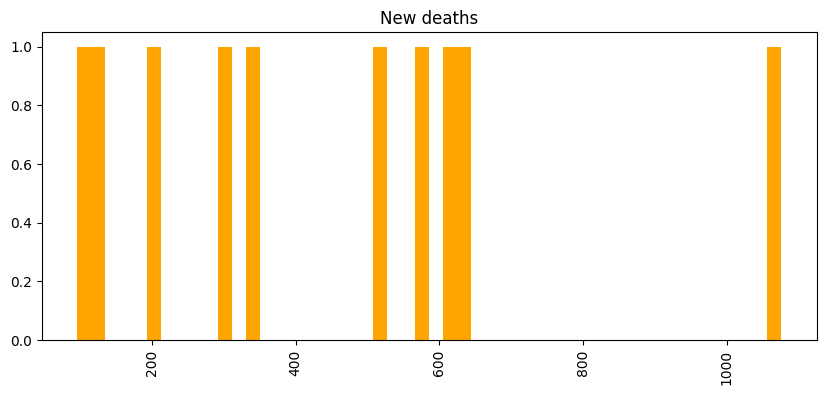

In [98]:
plt.figure(figsize=(10, 4))
plt.hist('New deaths',bins=50,color='orange', data=country_group.reset_index().sort_values('New deaths', ascending=False).head(10))
plt.title('New deaths')
plt.xticks(rotation=90)
plt.show()

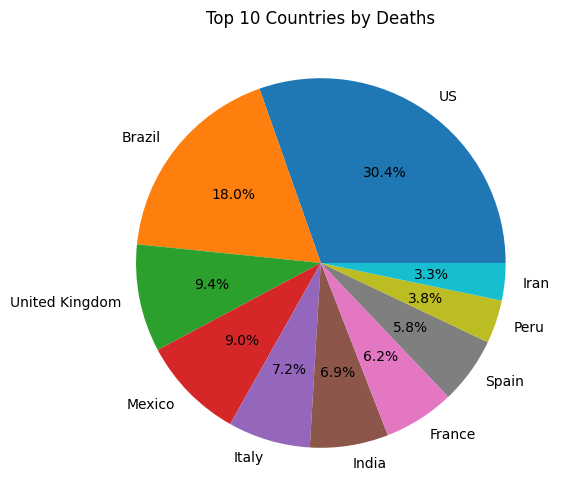

In [105]:
plt.figure(figsize=(6, 6))
plt.pie('Deaths',labels='Country/Region',autopct='%0.1f%%',data=country_group.reset_index().sort_values('Deaths',ascending=False).head(10))
plt.title('Top 10 Countries by Deaths')
plt.show()

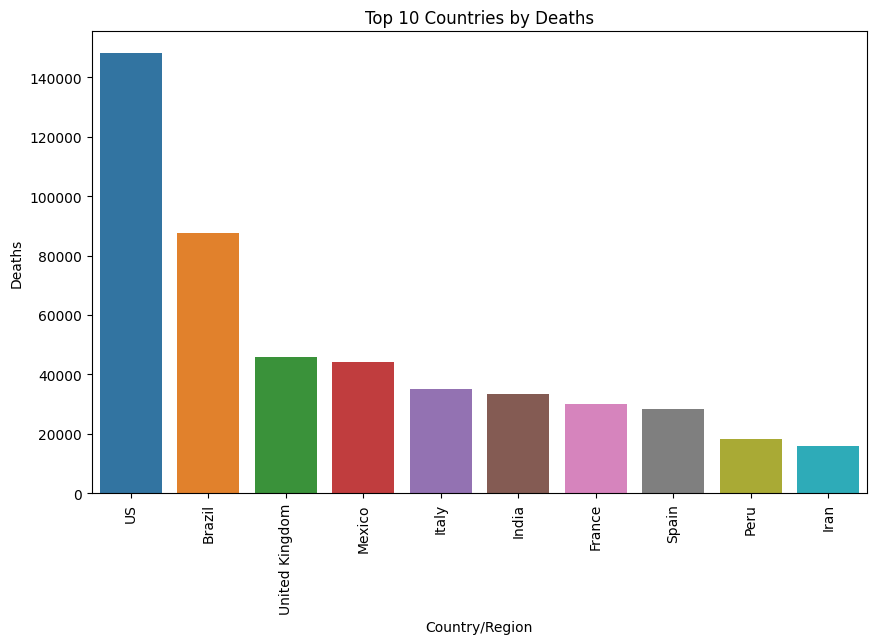

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country/Region', y='Deaths', data=country_group.reset_index().sort_values('Deaths', ascending=False).head(10))
plt.title('Top 10 Countries by Deaths')
plt.xticks(rotation=90)
plt.show()